### part 3 : company clustering customers

A company has gathered data about its customers and would like to identify similar clients, in order to propose relevant products to new clients, based on their features. This can be represented as a clustering problem. The data are stored in exercise_3/data.npy. They are 4 dimensional.


Pick:

— two clustering methods

— two heuristics to choose a relevant number of clusters,

and perform different clusterings of this dataset (overall, you have 2 ×2 = 4 methods). You must use a different metric for each clustering method. You could for instance use the standard euclidean metric for one method, and a different metric for the other method, for instance based on a rescaling of the dimensions of the data (hence, you could transform the data first, and apply a known metric on the
transformed data.)


Compare and discuss the difference between the results of the different methods you tried. Discuss whether one mehod (combination of the clustering method and of heuristic) seems to give more interesting or clearer results than the others.


You may use libraries such as scikit-learn in order to implement the methods.

### Prepare the data in two metrics (euclidean and cosine)

For this exercise, we will use the euclidean and cosine metrics.

In [1]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

data = np.load('data.npy')

Euclidean = data
Cosine = cosine_similarity(data)

### Declare a function to train and plot the results of the clustering

We will declare a generic function to train and plot the results of the clustering.

In [2]:
import matplotlib.pyplot as plt

def perform_clustering(method, metric, title):

    # Fit and predict clusters
    labels = method.fit_predict(metric)

    # Visualize the results
    plt.scatter(metric[:, 0], metric[:, 1], c=labels, cmap='viridis', edgecolor='k')
    plt.title(title)
    plt.show()


### K-means and AgglomerativeClustering with euclidean metric

First, we will use the K-means and AgglomerativeClustering methods with the euclidean metric.

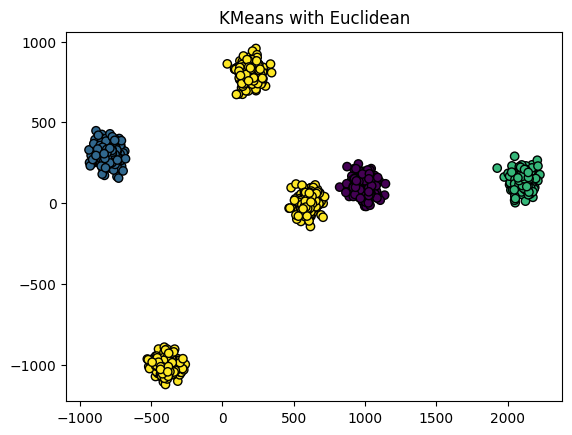

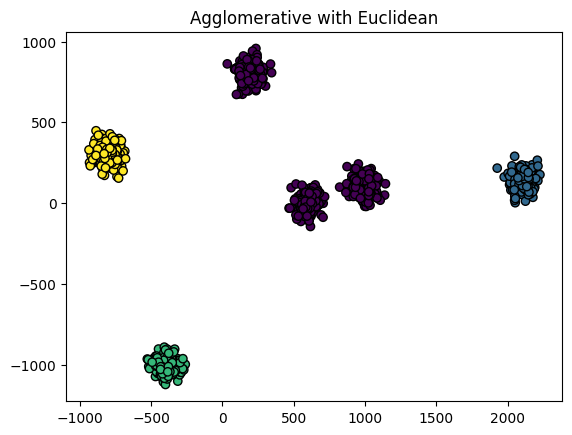

In [6]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

perform_clustering(KMeans(n_clusters=4, n_init="auto"), Euclidean, 'KMeans with Euclidean')
perform_clustering(AgglomerativeClustering(n_clusters=4, linkage='single'), Euclidean, 'Agglomerative with Euclidean')

### Conclusion

We can see a difference between the results of the different methods. In the case of the euclidean metric, the K-means method and the AgglomerativeClustering method give different results. And while rerunning the K-means method, we can see that the results are not always the same, while the AgglomerativeClustering method always gives the same results.

So, we can conclude that the Euclidean metric is not the best metric for this dataset.

### Agglomerative clustering

Now we will use the Agglomerative clustering algorithm with the euclidean metric and the cosine metric.

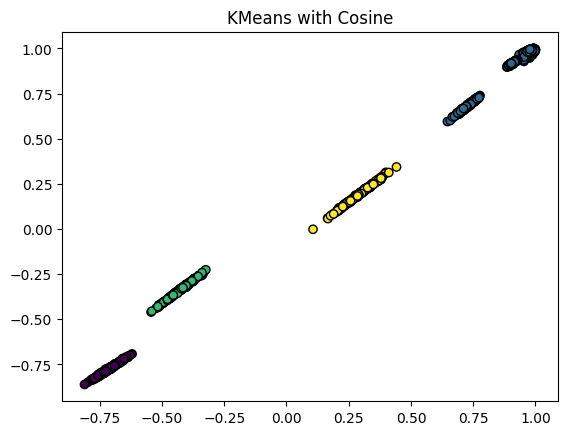

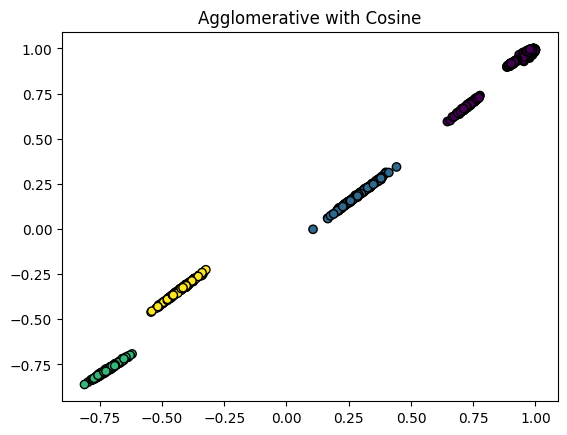

In [4]:
perform_clustering(KMeans(n_clusters=4, n_init="auto"), Cosine, 'KMeans with Cosine')
perform_clustering(AgglomerativeClustering(n_clusters=4, linkage='single'), Cosine, 'Agglomerative with Cosine')

### Conclusion

We can see that the cosine metric gives better results than the euclidean metric. Indeed, the clusters are more homogeneous with the cosine metric. The Agglomerative method and the K-means method give the same results with the cosine metric.

In conclusion, the cosine metric is the best metric for this dataset. And the Agglomerative method give a more homogeneous clustering than the K-means method.